In [231]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import curve_fit
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [197]:
oae = xr.open_dataset("c:\\Users\\junsu\\my_project\\data\\OAE_efficiency_maps_alltime.nc")

In [200]:
oae_df = oae.to_dataframe()
oae_df = oae_df.reset_index().pivot(
    index="N_month", columns=["nlat", "nlon", "season"], values="OAE_efficiency"
)
oae_df.dropna(axis=1, how="all", inplace=True)
oae_diffed = oae_df - oae_df.shift().fillna(0)

# Basic Analysis

## Time Series Plot

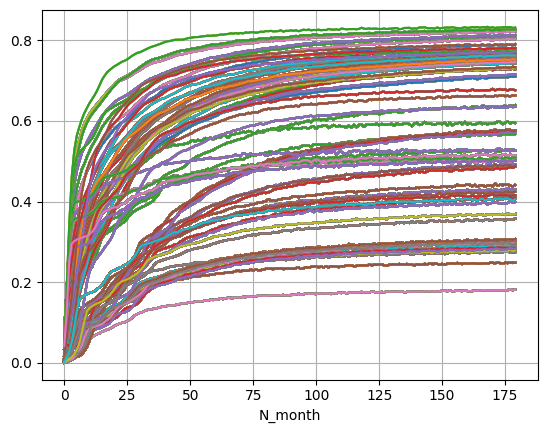

In [382]:
oae_df.iloc[:, :5000].plot(legend=False, grid=True)
plt.show()

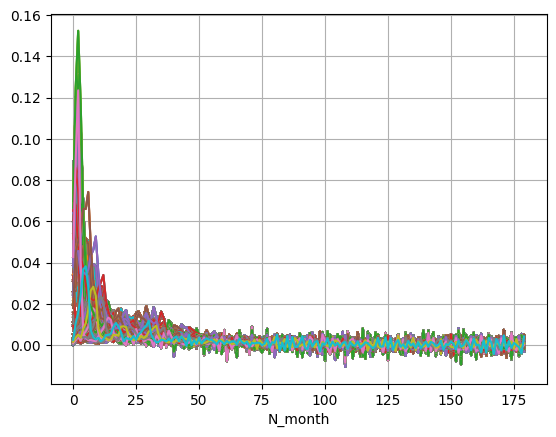

In [383]:
oae_diffed.iloc[:, :5000].plot(legend=False, grid=True)
plt.show()

## Drift

N_month
0      0.028776
1      0.042606
2      0.052881
3      0.043742
4      0.036604
         ...   
175    0.000080
176    0.000256
177    0.000665
178    0.000088
179    0.000247
Length: 180, dtype: float64

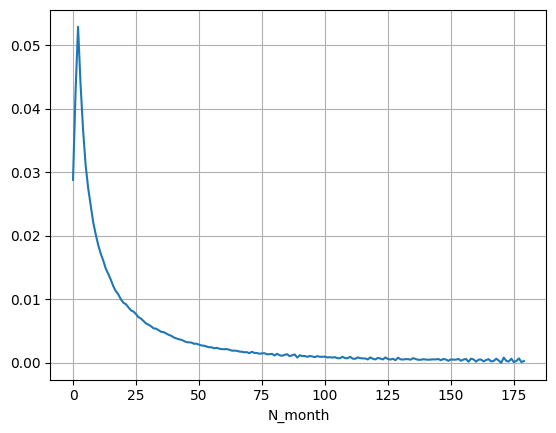

In [369]:
oae_diffed.mean(axis=1).plot(legend=False, grid=True)
oae_diffed.mean(axis=1)

## Relationship between Variables

### Seaonality

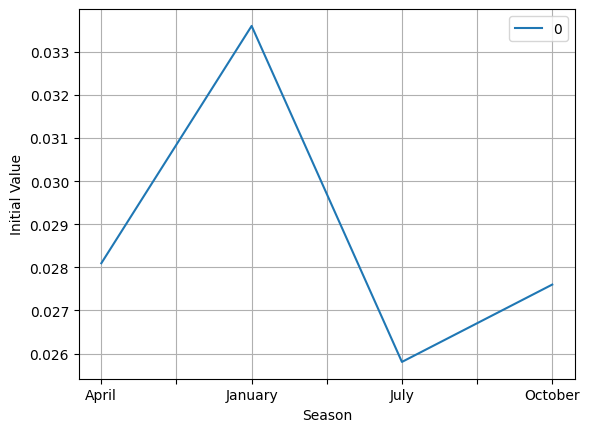

In [440]:
oae_df.iloc[0].groupby("season").mean().plot(legend=True, grid=True)
plt.xlabel("Season")
plt.ylabel("Initial Value")
plt.show()

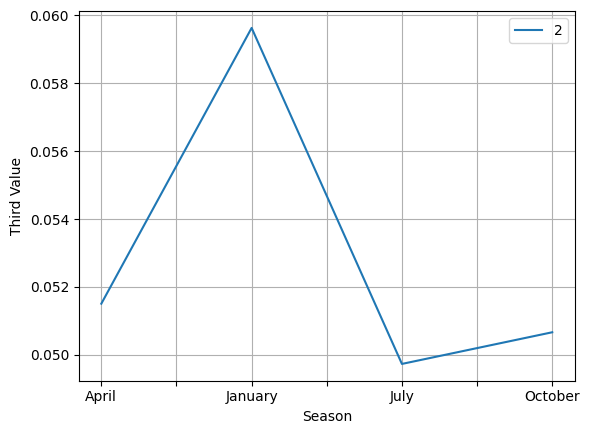

In [441]:
oae_diffed.iloc[2].groupby("season").mean().plot(legend=True, grid=True)
plt.xlabel("Season")
plt.ylabel("Third Value")
plt.show()

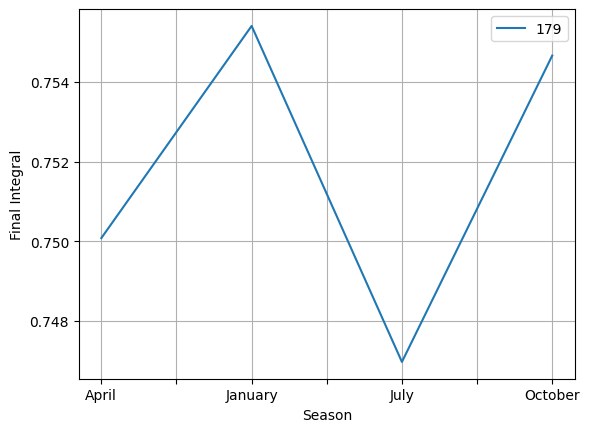

In [442]:
oae_df.iloc[-1].groupby("season").mean().plot(legend=True, grid=True)
plt.xlabel("Season")
plt.ylabel("Final Integral")
plt.show()

### Longitude

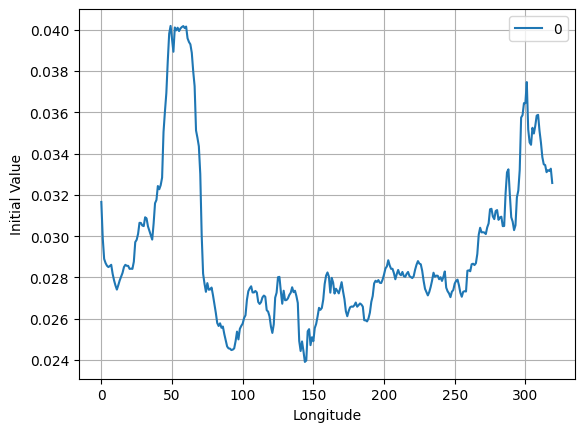

In [443]:
oae_df.iloc[0].groupby("nlon").mean().plot(legend=True, grid=True)
plt.xlabel("Longitude")
plt.ylabel("Initial Value")
plt.show()

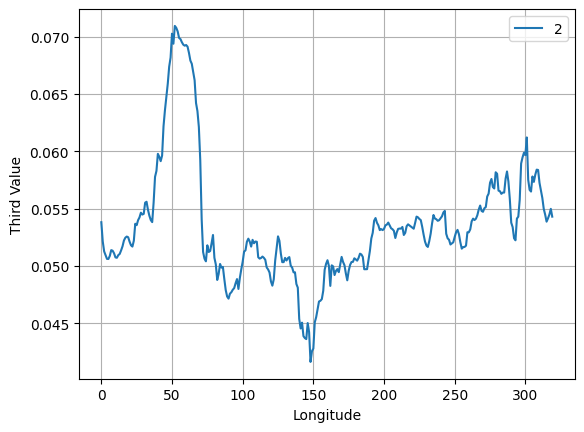

In [444]:
oae_diffed.iloc[2].groupby("nlon").mean().plot(legend=True, grid=True)
plt.xlabel("Longitude")
plt.ylabel("Third Value")
plt.show()

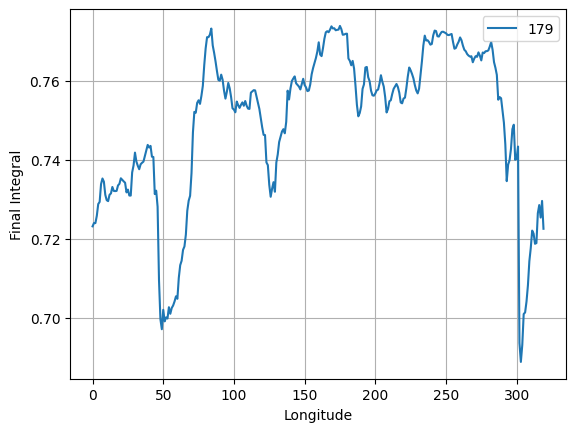

In [445]:
oae_df.iloc[-1].groupby("nlon").mean().plot(legend=True, grid=True)
plt.xlabel("Longitude")
plt.ylabel("Final Integral")
plt.show()

### Latitude

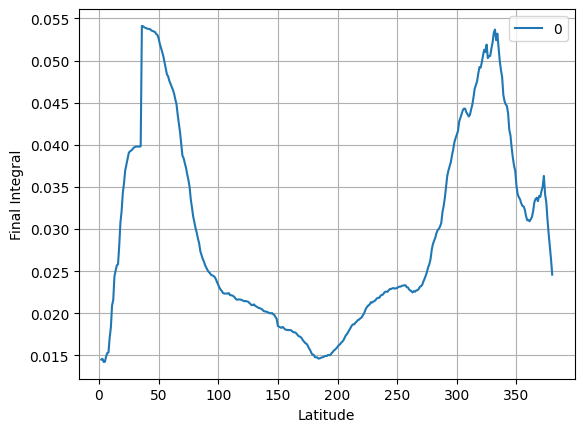

In [446]:
oae_df.iloc[0].groupby("nlat").mean().plot(legend=True, grid=True)
plt.xlabel("Latitude")
plt.ylabel("Final Integral")
plt.show()

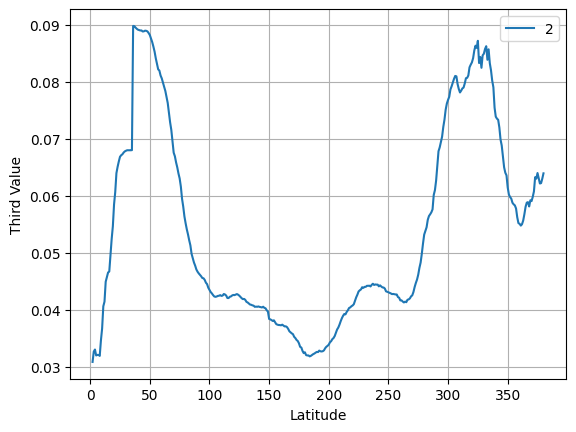

In [447]:
oae_diffed.iloc[2].groupby("nlat").mean().plot(legend=True, grid=True)
plt.xlabel("Latitude")
plt.ylabel("Third Value")
plt.show()

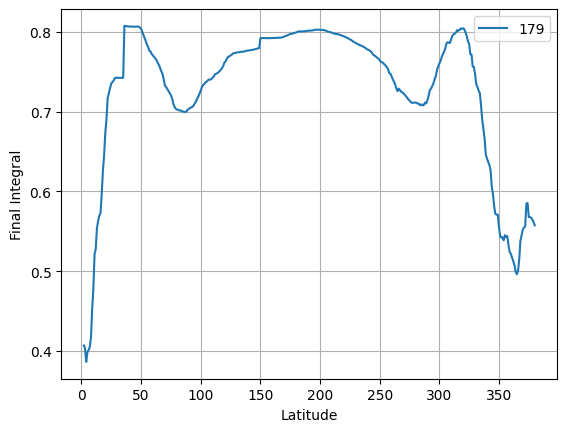

In [448]:
oae_df.iloc[-1].groupby("nlat").mean().plot(legend=True, grid=True)
plt.xlabel("Latitude")
plt.ylabel("Final Integral")
plt.show()

### Initial Value VS. Final Integral

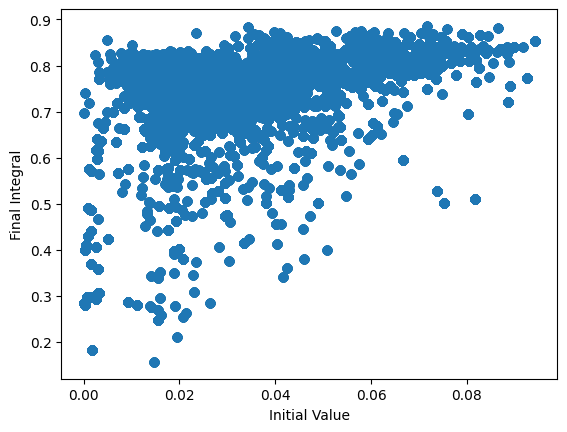

In [449]:
plt.scatter(oae_diffed.iloc[0], oae_df.iloc[-1])
plt.xlabel("Initial Value")
plt.ylabel("Final Integral")
plt.show()

### Third Value VS. Final Integral

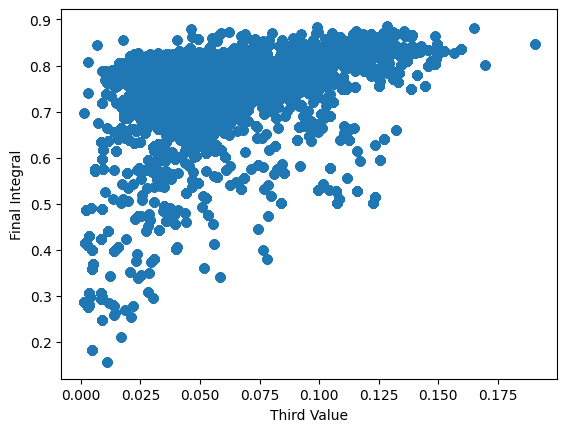

In [450]:
plt.scatter(oae_diffed.iloc[2], oae_df.iloc[-1])
plt.xlabel("Third Value")
plt.ylabel("Final Integral")
plt.show()

### Third Integral VS. Final Integral

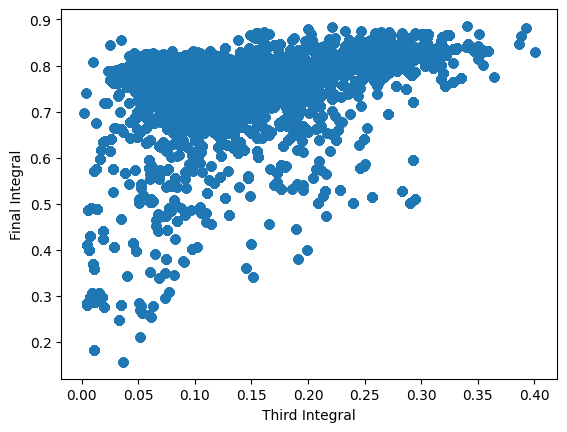

In [451]:
plt.scatter(oae_df.iloc[2], oae_df.iloc[-1])
plt.xlabel("Third Integral")
plt.ylabel("Final Integral")
plt.show()

# ANOVA

In [370]:
anova_df = (
    oae_diffed.iloc[[0, 2]]
    .transpose()
    .rename(columns={0: "initial_value", 2: "third_value"})
    .merge(
        oae_df.iloc[[2, -1]]
        .transpose()
        .rename(columns={2: "third_integral", 179: "final_integral"}),
        left_index=True,
        right_index=True,
    )
    .reset_index()
)

## Initial Value

In [371]:
model = ols("initial_value ~ nlat * nlon * C(season)", data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table["explained_variance (%)"] = anova_table["sum_sq"] / anova_table["sum_sq"].sum() * 100
display(anova_table)

,sum_sq,df,F,PR(>F),explained_variance (%)
C(season),2.670733,3.0,4243.596906,0.000000e+00,2.968627
nlat,2.716477,1.0,12948.844416,0.000000e+00,3.019474
nlat:C(season),18.080023,3.0,28727.819685,0.000000e+00,20.096677
nlon,0.063055,1.0,300.568802,2.661959e-67,0.070088
nlon:C(season),0.282509,3.0,448.886604,4.637959e-291,0.314021
nlat:nlon,0.000052,1.0,0.245682,6.201324e-01,0.000057
nlat:nlon:C(season),0.126242,3.0,200.588907,5.555723e-130,0.140323
Residual,66.026148,314732.0,NaN,NaN,73.390733


## Third Value

In [372]:
model = ols("third_value ~ nlat * nlon * C(season)", data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table["explained_variance (%)"] = anova_table["sum_sq"] / anova_table["sum_sq"].sum() * 100
display(anova_table)

,sum_sq,df,F,PR(>F),explained_variance (%)
C(season),4.907983,3.0,2953.463662,0.000000e+00,1.972919
nlat,4.717828,1.0,8517.104563,0.000000e+00,1.896480
nlat:C(season),64.501568,3.0,38814.937803,0.000000e+00,25.928445
nlon,0.090194,1.0,162.827178,2.787608e-37,0.036256
nlon:C(season),0.183489,3.0,110.417483,1.863668e-71,0.073759
nlat:nlon,0.015816,1.0,28.553376,9.121387e-08,0.006358
nlat:nlon:C(season),0.013131,3.0,7.901790,2.879170e-05,0.005278
Residual,174.337584,314732.0,NaN,NaN,70.080505


## Third Integral

In [379]:
model = ols("third_integral ~ nlat * nlon * C(season)", data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table["explained_variance (%)"] = anova_table["sum_sq"] / anova_table["sum_sq"].sum() * 100
display(anova_table)

,sum_sq,df,F,PR(>F),explained_variance (%)
C(season),33.271742,3.0,3532.125072,0.000000e+00,2.364661
nlat,37.383029,1.0,11905.736797,0.000000e+00,2.656855
nlat:C(season),344.416914,3.0,36563.267899,0.000000e+00,24.478109
nlon,0.912836,1.0,290.719773,3.707348e-65,0.064876
nlon:C(season),1.829221,3.0,194.189915,7.915515e-126,0.130005
nlat:nlon,0.255097,1.0,81.243248,2.006510e-19,0.018130
nlat:nlon:C(season),0.739250,3.0,78.478665,9.646815e-51,0.052539
Residual,988.232456,314732.0,NaN,NaN,70.234824


## Final Integral

In [376]:
model = ols("final_integral ~ nlat * nlon * C(season) * initial_value", data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table["explained_variance (%)"] = anova_table["sum_sq"] / anova_table["sum_sq"].sum() * 100
display(anova_table)

,sum_sq,df,F,PR(>F),explained_variance (%)
C(season),12.580537,3.0,818.438906,0.000000e+00,0.579925
nlat,3.131404,1.0,611.149497,8.469165e-135,0.144348
nlat:C(season),85.706951,3.0,5575.747765,0.000000e+00,3.950835
nlon,7.892668,1.0,1540.395146,0.000000e+00,0.363828
nlon:C(season),0.560734,3.0,36.479100,1.463818e-23,0.025848
nlat:nlon,81.909156,1.0,15986.035704,0.000000e+00,3.775768
nlat:nlon:C(season),15.813792,3.0,1028.781406,0.000000e+00,0.728969
initial_value,8.259751,1.0,1612.037945,0.000000e+00,0.380750
C(season):initial_value,46.362803,3.0,3016.176571,0.000000e+00,2.137187
nlat:initial_value,117.173307,1.0,22868.465149,0.000000e+00,5.401341


In [377]:
model = ols("final_integral ~ nlat * nlon * C(season) * third_value", data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table["explained_variance (%)"] = anova_table["sum_sq"] / anova_table["sum_sq"].sum() * 100
display(anova_table)

,sum_sq,df,F,PR(>F),explained_variance (%)
C(season),11.520362,3.0,784.522226,0.000000e+00,0.543910
nlat,0.310415,1.0,63.416565,1.678572e-15,0.014656
nlat:C(season),93.585016,3.0,6373.022680,0.000000e+00,4.418427
nlon,8.313911,1.0,1698.500903,0.000000e+00,0.392524
nlon:C(season),0.521739,3.0,35.529787,5.998959e-23,0.024633
nlat:nlon,59.937167,1.0,12244.938506,0.000000e+00,2.829812
nlat:nlon:C(season),12.471869,3.0,849.318682,0.000000e+00,0.588834
third_value,38.729545,1.0,7912.300954,0.000000e+00,1.828537
C(season):third_value,67.478871,3.0,4595.226818,0.000000e+00,3.185878
nlat:third_value,56.366835,1.0,11515.533202,0.000000e+00,2.661246


In [378]:
model = ols("final_integral ~ nlat * nlon * C(season) * third_integral", data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table["explained_variance (%)"] = anova_table["sum_sq"] / anova_table["sum_sq"].sum() * 100
display(anova_table)

,sum_sq,df,F,PR(>F),explained_variance (%)
C(season),14.190838,3.0,955.540841,0.000000e+00,0.664902
nlat,1.008761,1.0,203.774964,3.240017e-46,0.047265
nlat:C(season),84.600280,3.0,5696.564312,0.000000e+00,3.963889
nlon,8.595000,1.0,1736.234253,0.000000e+00,0.402713
nlon:C(season),0.503787,3.0,33.922522,6.529921e-22,0.023605
nlat:nlon,67.858266,1.0,13707.719778,0.000000e+00,3.179453
nlat:nlon:C(season),10.906113,3.0,734.363677,0.000000e+00,0.510999
third_integral,26.499299,1.0,5352.995036,0.000000e+00,1.241607
C(season):third_integral,53.587241,3.0,3608.299738,0.000000e+00,2.510794
nlat:third_integral,79.643040,1.0,16088.304895,0.000000e+00,3.731621


# Parametric Approach

## Normalization

### Reduced Model

In [434]:
model = ols("third_value ~ C(season) + nlat + C(season):nlat", data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table["explained_variance (%)"] = anova_table["sum_sq"] / anova_table["sum_sq"].sum() * 100
display(anova_table)

,sum_sq,df,F,PR(>F),explained_variance (%)
C(season),4.907983,3.0,2948.420617,0.0,1.973072
nlat,4.701177,1.0,8472.552567,0.0,1.889934
C(season):nlat,64.498837,3.0,38747.020839,0.0,25.929367
Residual,174.640213,314740.0,NaN,NaN,70.207626


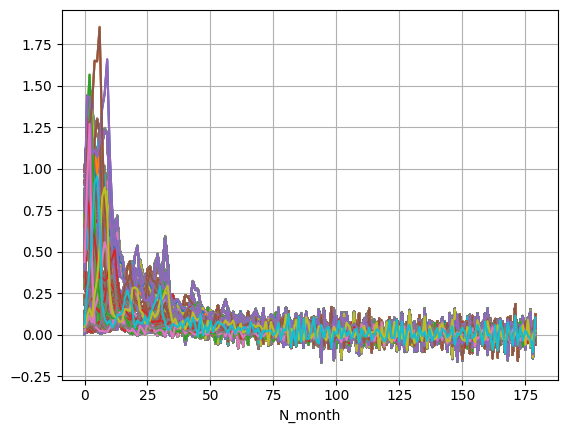

In [435]:
(oae_diffed.iloc[:, :5000].div(model.fittedvalues[:5000].to_numpy(), axis=1)).plot(
    legend=False, grid=True
)
plt.show()

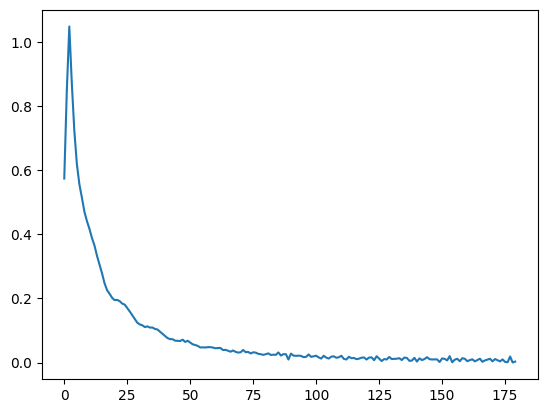

N_month
0      0.574162
1      0.846030
2      1.048454
3      0.870165
4      0.722658
         ...   
175    0.002098
176    0.001360
177    0.019055
178    0.000402
179    0.003111
Length: 180, dtype: float64

In [436]:
normalized_oae_diffed = oae_diffed.div(model.fittedvalues.to_numpy(), axis=1)
drift = normalized_oae_diffed.mean(axis=1).dropna()
plt.plot(drift)
plt.show()
drift

In [437]:
truncated_drift = drift[2:]
truncated_drift.index = truncated_drift.index + 1

## Log Transformation

### Exponential Decay

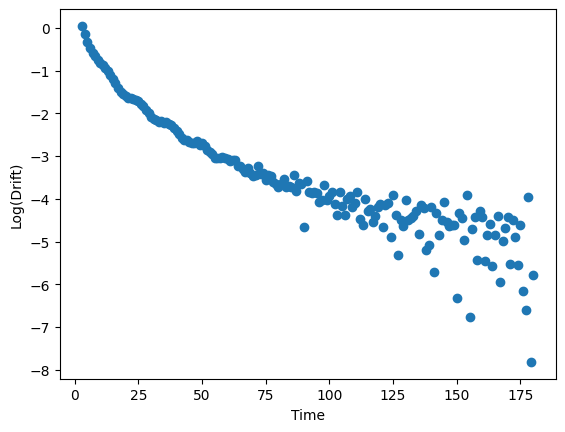

In [409]:
plt.scatter(truncated_drift.index + 1, np.log(truncated_drift))
plt.xlabel("Time")
plt.ylabel("Log(Drift)")
plt.show()

In [413]:
model = sm.OLS(np.log(truncated_drift), sm.add_constant(truncated_drift.index))
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1055.
Date:                Thu, 01 May 2025   Prob (F-statistic):           2.89e-76
Time:                        16:16:29   Log-Likelihood:                -136.93
No. Observations:                 178   AIC:                             277.9
Df Residuals:                     176   BIC:                             284.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2673      0.080    -15.764      0.0

### Power Law

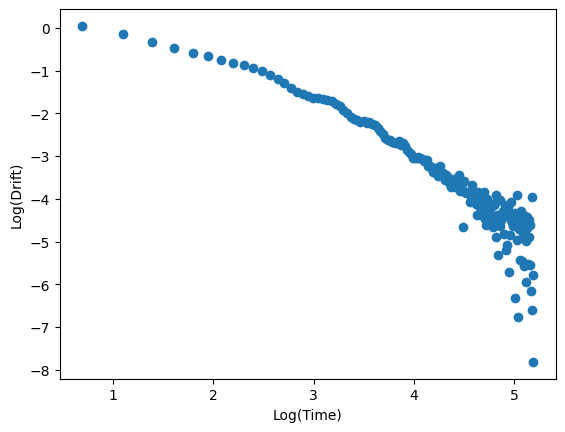

In [392]:
plt.scatter(np.log(truncated_drift.index), np.log(truncated_drift))
plt.xlabel("Log(Time)")
plt.ylabel("Log(Drift)")
plt.show()

In [414]:
model = sm.OLS(np.log(truncated_drift), sm.add_constant(np.log(truncated_drift.index)))
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1311.
Date:                Thu, 01 May 2025   Prob (F-statistic):           1.74e-83
Time:                        16:16:45   Log-Likelihood:                -120.13
No. Observations:                 178   AIC:                             244.3
Df Residuals:                     176   BIC:                             250.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8787      0.181     15.908      0.0

### Shifted Power law

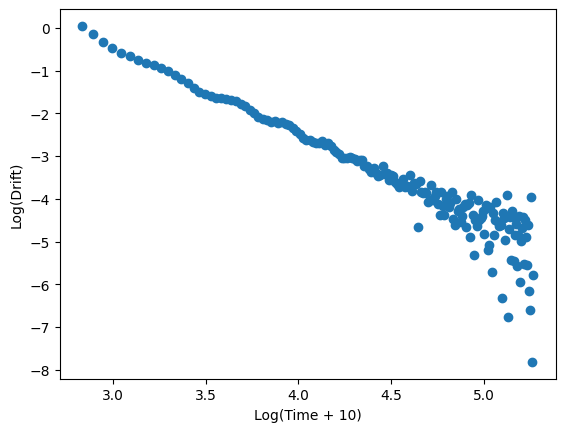

In [400]:
plt.scatter(np.log(truncated_drift.index + 15), np.log(truncated_drift))
plt.xlabel("Log(Time + 15)")
plt.ylabel("Log(Drift)")
plt.show()

In [415]:
model = sm.OLS(np.log(truncated_drift), sm.add_constant(np.log(truncated_drift.index + 15)))
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     1748.
Date:                Thu, 01 May 2025   Prob (F-statistic):           2.46e-93
Time:                        16:17:02   Log-Likelihood:                -97.207
No. Observations:                 178   AIC:                             198.4
Df Residuals:                     176   BIC:                             204.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2101      0.235     26.379      0.0

## Estimating the Optiaml Shift

t0:  20.94897495753198 alpha:  7.304921461553931 beta:  -2.3643023749159164


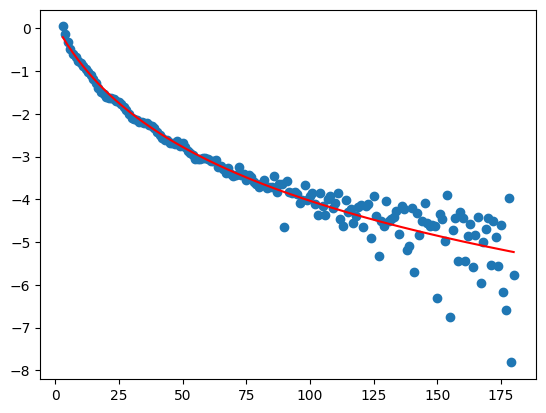

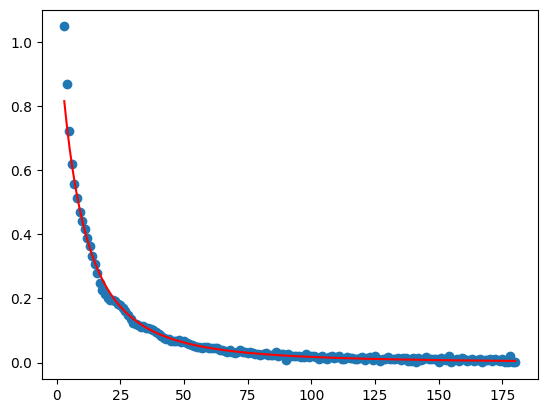

R-squared:  0.9801697022871758


In [431]:
# log transformed shifted power law model
def shifted_powerlaw(t, t0, alpha, beta):
    return alpha + beta * np.log(t + t0)


# Initial guess
# log(drift) = 6.2101 -2.1615 * log(t + 15)
p0 = [15.0, 6.2101, -2.1615]

# Fit the model
params, cov = curve_fit(
    shifted_powerlaw,
    truncated_drift.index,
    np.log(truncated_drift),
    p0=p0,
    bounds=([0, 0, -10], [100, 100, 0]),
)
print("t0: ", params[0], "alpha: ", params[1], "beta: ", params[2])

plt.scatter(truncated_drift.index, np.log(truncated_drift))
plt.plot(truncated_drift.index, shifted_powerlaw(truncated_drift.index, *params), color="red")
plt.show()

plt.scatter(truncated_drift.index, truncated_drift)
plt.plot(
    truncated_drift.index, np.exp(shifted_powerlaw(truncated_drift.index, *params)), color="red"
)
plt.show()

print(
    "R-squared: ",
    1
    - np.sum((truncated_drift - np.exp(shifted_powerlaw(truncated_drift.index, *params))) ** 2)
    / np.sum((truncated_drift - truncated_drift.mean()) ** 2),
)

t0:  7.636568947327824 alpha:  3.8883534703021323 beta:  -1.6431417036409475


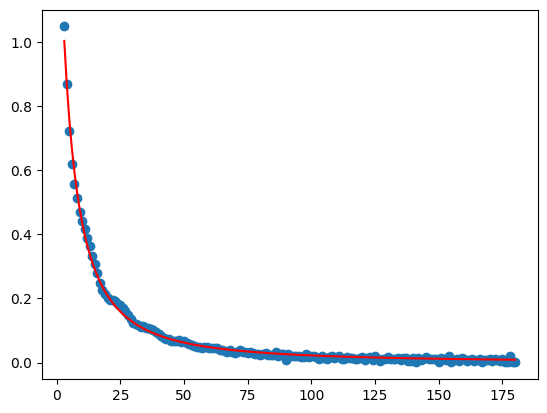

R-squared:  0.9962212735972537


In [432]:
# shifted power law model
def shifted_powerlaw(t, t0, alpha, beta):
    return np.exp(alpha) * (t + t0) ** beta


# Initial guess
# drift = exp(6.2101 -2.1615 * log(t + 15)) = exp(6.2101) * (t + 15)**(-2.1615)
p0 = [15.0, 6.2101, -2.1615]

# Fit the model
params, cov = curve_fit(
    shifted_powerlaw,
    truncated_drift.index,
    truncated_drift,
    p0=p0,
    bounds=([0, 0, -10], [100, 100, 0]),
)
print("t0: ", params[0], "alpha: ", params[1], "beta: ", params[2])

plt.scatter(truncated_drift.index, truncated_drift)
plt.plot(truncated_drift.index, shifted_powerlaw(truncated_drift.index, *params), color="red")
plt.show()

print(
    "R-squared: ",
    1
    - np.sum((truncated_drift - shifted_powerlaw(truncated_drift.index, *params)) ** 2)
    / np.sum((truncated_drift - truncated_drift.mean()) ** 2),
)

# Stochastic Process

## Ornstein-Uhlenbeck Process

Intuitively, we should use a stochastic process that tends to zero and depends on the previous state to model the $\Delta \text{CO}_2$.
The Ornstein-Uhlenbeck process whcih is a continuous counterpart to AR(1) process is the simplest process that satisfies such properties:
$$\mathrm{d}X_t = -\kappa X_t \mathrm{d}t + \sigma \mathrm{d}W_t.$$
This SDE has a closed-form solution and its transition density is Gaussian.

## Extension to OU Process

One of natural extensions to this process can be formulated as follows:
$$\mathrm{d}X_t = -f(t) X_t \mathrm{d}t + g(t) \mathrm{d}W_t$$
where $f(t), g(t) > 0$.

### Solution

The solution to this SDE is calculated as follows:
$$
    X_t = e^{-F(t)}X_0 + e^{-F(t)}\int_0^t g(u) e^{F(u)} \mathrm{d}W_u
$$
where $F(t) = \int_0^t f(u) \mathrm{d}u$.

#### Derivation

$$
    \begin{align}
    g(t) e^{F(t)} \mathrm{d}W_t &= e^{F(t)} \mathrm{d}X_t + f(t) e^{F(t)} X_t \mathrm{d}t\\
    &= \mathrm{d} \left(e^{F(t)} X_t \right).
\end{align}
$$
Therefore,
$$
    e^{F(t)} X_t  = X_0 + \int_0^t g(u) e^{F(u)} \mathrm{d}W_u
$$

### Our Case

The drift should look like a shifted power law. Therefore,
$$
    e^{-F(t)} = \exp\left(\alpha + \beta \log\left(t + t_0\right) \right).
$$
$$
\Rightarrow F(t) = -\alpha - \beta \log\left(t + t_0\right) \text{ and } f(t) = - \frac{\beta}{t + t_0}
$$

This implies that the speed of mean reversion gets slower as time elapses.